# Test PGF vs Z - 19Mar

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
from matplotlib.pylab import *
rcParams['figure.figsize'] = (12,8)
rcParams['font.size'] = 18
#import logging

In [2]:
import pynbody
import pynbody.plot.sph as sph
import mmap
pynbody.ramses.multiprocess_num = 8
pynbody.config['number_of_threads'] = 64

In [3]:
pynbody.openmp.get_cpus()

16

In [4]:
import matplotlib.pyplot as plt 

In [6]:
s = pynbody.load('output_00008')
s['pos']
s['pos'] -= 0.5
s.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Loading data from CPU 1
INFO:pynbody.snapshot.ramses:Loading data from CPU 2
INFO:pynbody.snapshot.ramses:Loading data from CPU 3
INFO:pynbody.snapshot.ramses:Loading data from CPU 4
INFO:pynbody.snapshot.ramses:Loading data from CPU 5
INFO:pynbody.snapshot.ramses:Loading data from CPU 6
INFO:pynbody.snapshot.ramses:Loading data from CPU 7
INFO:pynbody.snapshot.ramses:Loading data from CPU 8
INFO:pynbody.snapshot.ramses:Loading data from CPU 9
INFO:pynbody.snapshot.ramses:Loading data from CPU 10
INFO:pynbody.snapshot.ramses:Loading data from CPU 11
INFO:pynbody.snapshot.ramses:Loading data from CPU 12
INFO:pynbody.snapshot.ramses:Loading data from CPU 13
INFO:pynbody.snapshot.ramses:Loading data from CPU 14
INFO:pynbody.snapshot.ramses:Loading data from CPU 15
INFO:pynbody.snapshot.ramses:Loading data from CPU 16
INFO:pynbody.sna

In [6]:
z = 1/s.properties['a']-1
print "Redshift =",z
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print boxsizestring
print s.properties['a']

Redshift = 21.6485241585
18.62 kpc
0.0441529873205


In [7]:
len(s.g['pgf'][s.g['pgf']>1.0])

1928052

In [8]:
temp=s.g['pgf'][s.g['pgf']>1.0]-1.0

In [9]:
len(temp[temp>1e-7])

0

In [10]:
temp[temp>1e-7]

SimArray([], dtype=float64)

In [11]:
len(s.g['metal'][s.g['metal']<0.0]),len(s.g['metal'][(s.g['metal']<1e-10) & (s.g['metal']>0.0)])

(20, 1)

In [12]:
len(s.g['metal'] > 0.0)

20361217

In [13]:
s.g['metal'][s.g['metal']<1e-7] = 0.0
s.g['pzf'][s.g['pzf']<1e-7] = 0.0
s.g['pgf'][s.g['pgf']>(1.0-1e-7)] = 1.0
linex=(1e-7,1)

In [14]:
s.g['metal'][(s.g['metal']<1e-1) & (s.g['metal'] > 0.0)]

SimArray([  5.47722789e-06,   1.00050806e-05,   1.51108690e-05, ...,
         2.28044668e-05,   4.73015762e-05,   2.65210585e-05])

In [15]:
s.g['pgf'][(s.g['pgf']> 1.0 - 1e-7) & (s.g['pgf'] < 1.0)]

SimArray([], dtype=float64)

In [16]:
s.properties['a']

0.04415298732053

# Plot

### The 12.4514423189731 comes from the output and is the slope of (1-P)/Z for those cells in the blast zone.

In [17]:
liney=(1e-7*12.45144,12.45144) # Y coords of line with slope 12.4514423189731

(1e-07, 1)

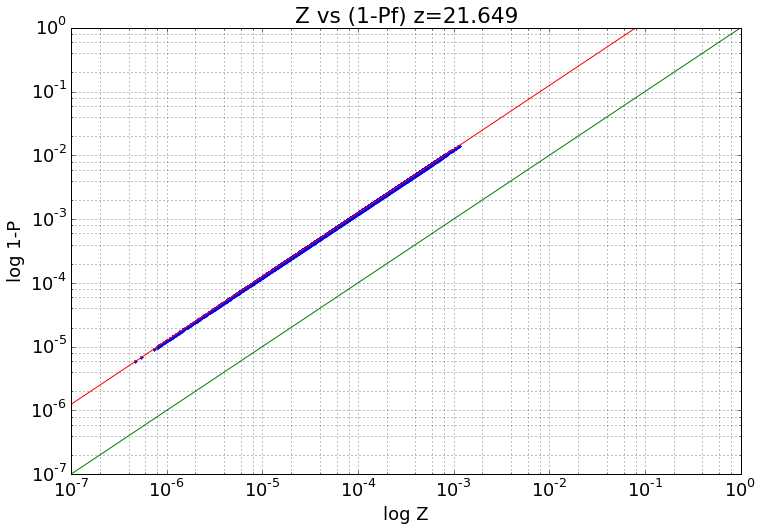

In [18]:
plt.loglog(s.g['metal'],1.0-s.g['pgf'],'.',linex,linex,linex,liney)
plt.title("Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

In [19]:
# Look at some of the points below the line ... what is there ratio?
print 10.0**-5.4/10.0**-5.8
print 10**-4.9/10**-5.45
print 10**-3.95/10**-5.0

2.51188643151
3.54813389234
11.220184543


In [20]:
# Compute the ratio we plot above... Add 1e-10 to avoid divide by 0. So 0/0 -> 1.0
s.g['ratio'] = (1.0e0 - s.g['pgf'] + 1e-10)/(s.g['metal'] + 1e-10)
s.g['ratio2'] = (1.0e0 - s.g['pgf'] + 1e-10)/(12.45144*s.g['metal'] + 1e-10)

In [21]:
min(s.g['ratio']),max(s.g['ratio'])

(1.0, 12.45144131472259)

### Setup some filters to get at data in the non-expected range

In [22]:
# The points below the line but not equal to 1 ... which means 1e-10/1e-10
arrayFilter = (s.g['ratio'] < 12.4) & (s.g['ratio'] > 1.0) & (s.g['ratio'] != 1.0) # Between 1 and 12.4
arrayFilter2 = ((s.g['ratio'] < 12.45) | (s.g['ratio'] > 12.5)) & (s.g['ratio'] != 1.0) # Off the line, will be 1 if Z & (1-PGF)=0
arrayFilter3 = ((s.g['ratio'] < 12.3) | (s.g['ratio'] > 12.7)) & (s.g['ratio'] != 1.0) # A bit further from the line
arrayGoodPts = ((s.g['ratio'] > 12.45) | (s.g['ratio'] < 12.5)) & (s.g['ratio'] != 1.0)

In [23]:
# ratio2 has Z adjusted by the slope: 12.45. So ratio2 will be 1 for points on the line...  
newarrayFilter2 = ((s.g['ratio2'] < 0.99 ) | (s.g['ratio2'] > 1.01)) & (s.g['ratio'] != 1.0) # Off the line
newarrayFilter3 = ((s.g['ratio2'] < 0.90) | (s.g['ratio2'] > 1.1)) & (s.g['ratio'] != 1.0) # A bit further from the line

In [24]:
# The points below the line 
len(s.g['ratio'][arrayFilter]),s.g['ratio'][arrayFilter][0:20]

(0, SimArray([], dtype=float64))

### These are really the bogus points... or, something is going on I don't understand.

In [25]:
# Off the line 
len(s.g['ratio'][arrayFilter2]),s.g['ratio'][arrayFilter2][0:20]

(4, SimArray([ 12.44989566,  12.44999702,  12.44902214,  12.44934761]))

In [26]:
len(s.g['ratio'][arrayFilter2])

4

In [27]:
len(s.g['ratio'][s.g['ratio'] != 1.0])

2927

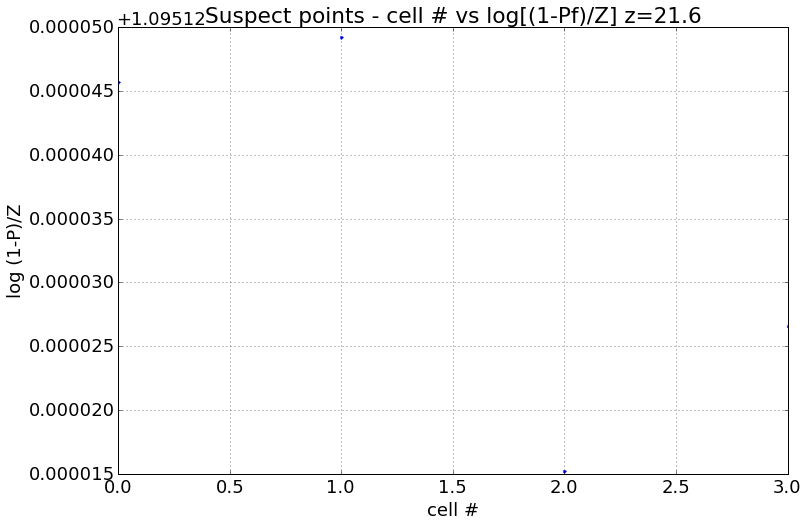

In [28]:
plt.plot(log10(s.g['ratio'][arrayFilter2]),'.')
plt.title("Suspect points - cell # vs log[(1-Pf)/Z] z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell #")
axes().set_ylabel("log (1-P)/Z")
#plt.ylim(-1, 10)
#plt.xlim(1e-7, 1)

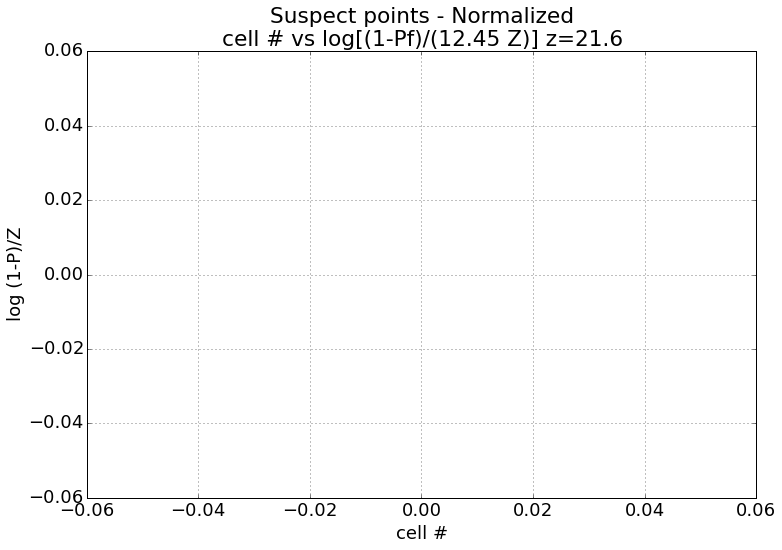

In [29]:
plt.plot(log10(s.g['ratio2'][newarrayFilter2]),'.')
plt.title("Suspect points - Normalized\ncell # vs log[(1-Pf)/(12.45 Z)] z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell #")
axes().set_ylabel("log (1-P)/Z")
#plt.ylim(-1, 10)
#plt.xlim(1e-7, 1)

(1e-07, 1)

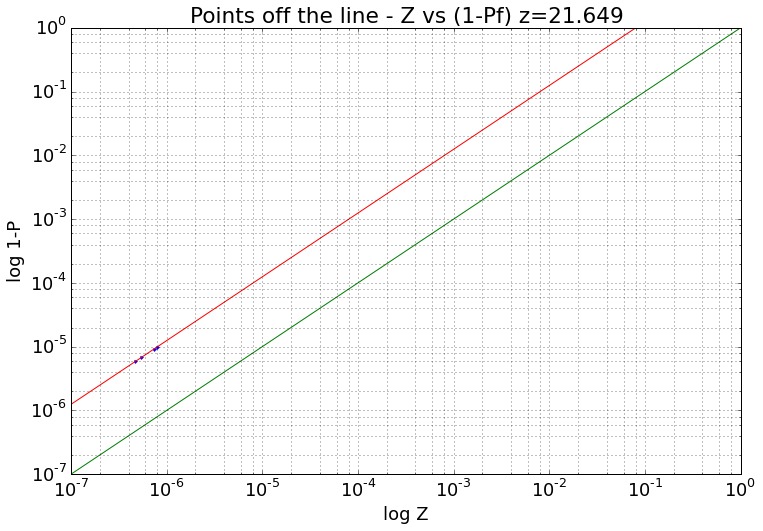

In [31]:
plt.loglog(s.g['metal'][arrayFilter2],1.0-s.g['pgf'][arrayFilter2],'.',linex,linex,linex,liney)
plt.title("Points off the line - Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

(1e-07, 1)

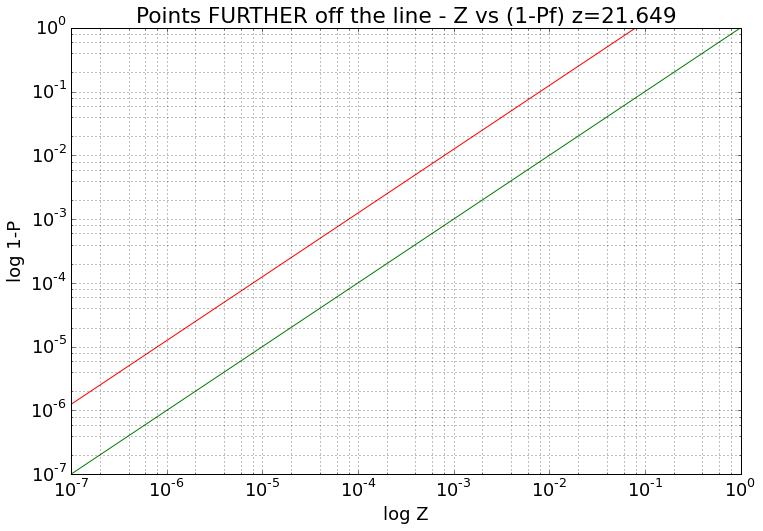

In [32]:
plt.loglog(s.g['metal'][arrayFilter3],1.0-s.g['pgf'][arrayFilter3],'.',linex,linex,linex,liney)
plt.title("Points FURTHER off the line - Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")
plt.ylim(1e-7, 1)
plt.xlim(1e-7, 1)

(0, 0.00035)

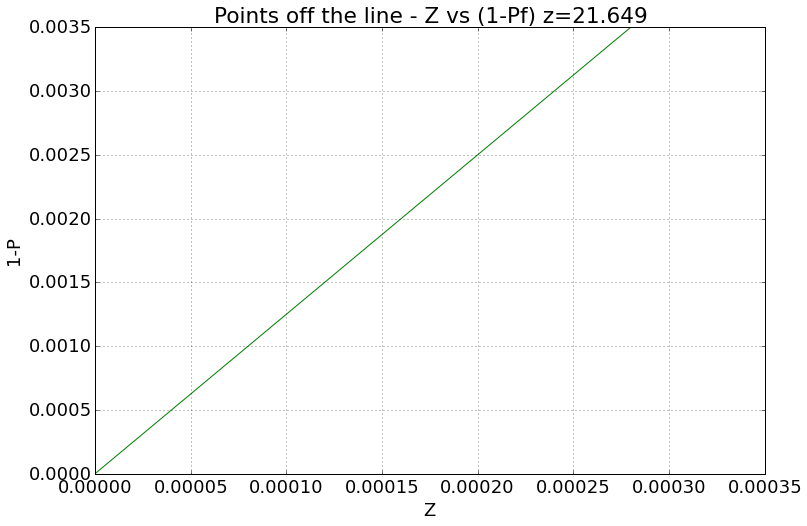

In [33]:
plt.plot(s.g['metal'][arrayFilter3],1.0-s.g['pgf'][arrayFilter3],'.',(0,1),(0,12.5))
plt.title("Points off the line - Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("Z")
axes().set_ylabel("1-P")
plt.ylim(0, 0.0035)
plt.xlim(0, 0.00035)

In [34]:
badPoints = s.g['pos'][arrayFilter3]
goodPoints = s.g['pos'][arrayGoodPts]
# Pull out the x and y coords.
badXY = badPoints[...,[0,1]]
print len(badXY)
goodXY = goodPoints[...,[0,1]]
print len(goodXY)

0
2927


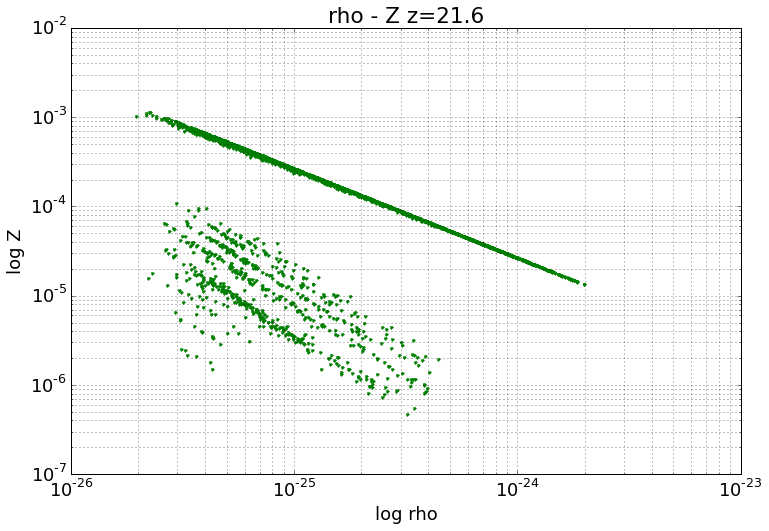

In [35]:
plt.loglog(s.g['rho'][arrayFilter3].in_units("g cm^-3"),s.g['metal'][arrayFilter3],'ro',
           s.g['rho'][arrayGoodPts].in_units("g cm^-3"),s.g['metal'][arrayGoodPts],'g.')
plt.title("rho - Z z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log rho")
axes().set_ylabel("log Z")
#plt.ylim(1e-7, 1)
#plt.xlim(1e-7, 1)

In [36]:
boxsizestring

'18.62 kpc'

(-9.3, 9.3)

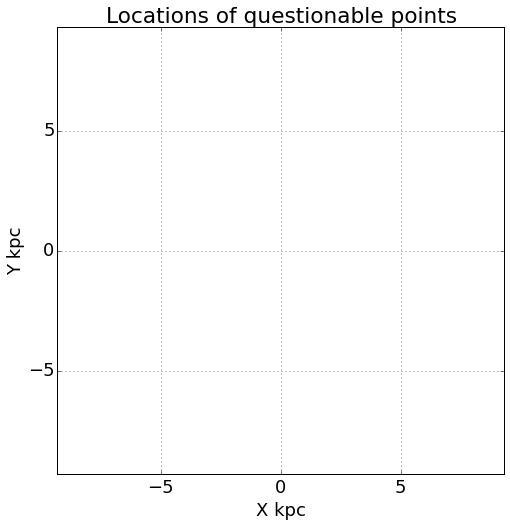

In [37]:
plt.plot(badXY[...,0],badXY[...,1],'.')
plt.title("Locations of questionable points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.ylim(-9.3, 9.3)
plt.xlim(-9.3, 9.3)

(-1.6, -0.3)

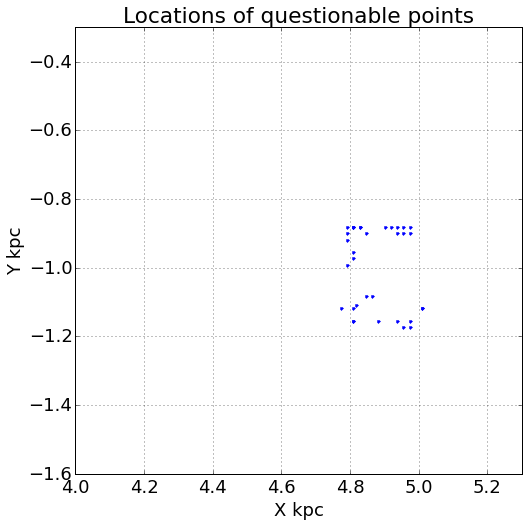

In [39]:
plt.plot(badXY[...,0],badXY[...,1],'.')
plt.title("Locations of questionable points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.xlim(4.0, 5.3)
plt.ylim(-1.6, -0.3)

(-1.3, -0.75)

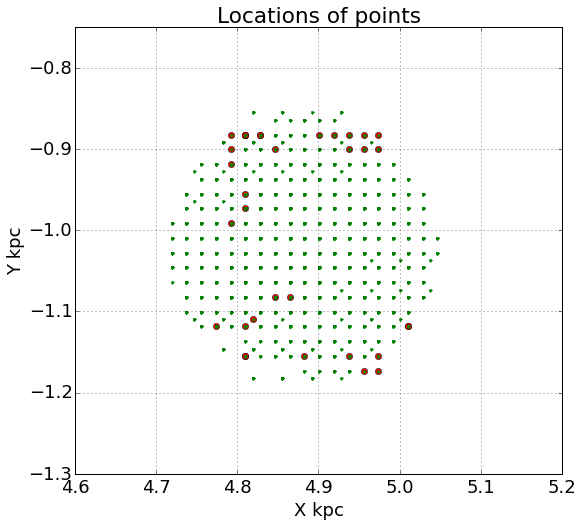

In [38]:
plt.plot(badXY[...,0],badXY[...,1],'ro',
         goodXY[...,0],goodXY[...,1],'g.')
plt.title("Locations of points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.xlim(4.6, 5.2)
plt.ylim(-1.3, -0.75)

(-1.1, -0.85)

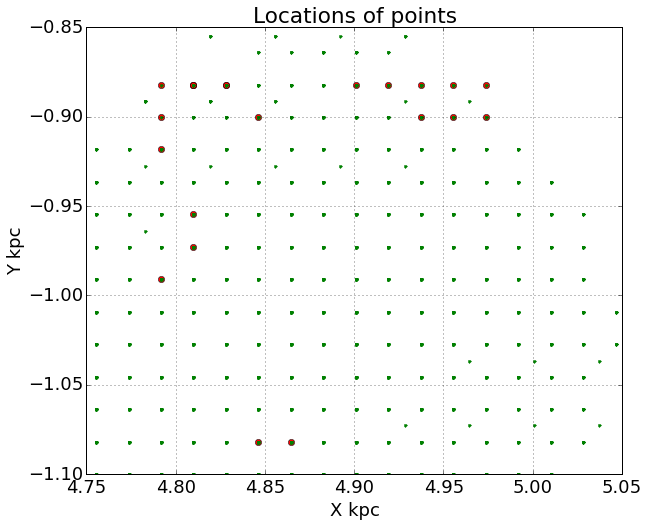

In [42]:
plt.plot(badXY[...,0],badXY[...,1],'ro',
         goodXY[...,0],goodXY[...,1],'g.')
plt.title("Locations of points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.xlim(4.75, 5.05)
plt.ylim(-1.1, -0.85)

(-1.6, -0.3)

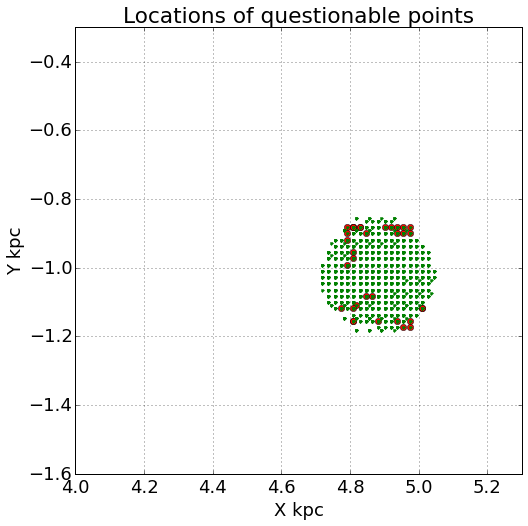

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(badXY[...,0],badXY[...,1],'ro')
ax1.plot(goodXY[...,0],goodXY[...,1],'g.')
plt.title("Locations of questionable points")
plt.grid(True, which="both")
axes().set_xlabel("X kpc")
axes().set_ylabel("Y kpc")
axes().set_aspect('equal')
plt.xlim(4.0, 5.3)
plt.ylim(-1.6, -0.3)

In [18]:
# Cut out a cube of the "important data" ... around the area of interest above. 
impData = s[pynbody.filt.Cuboid("4.0 kpc", "-1.6 kpc","-5 kpc","5.3 kpc", "-.3 kpc", "0 kpc")]

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.snapshot:Deriving array mass
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


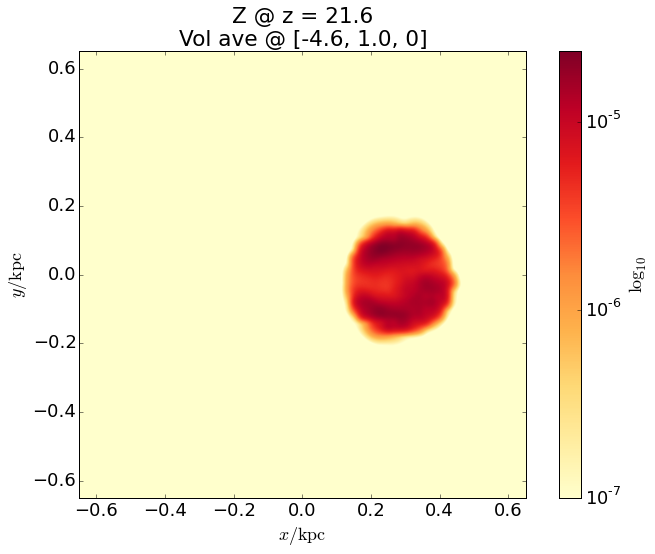

In [45]:
coords= [-4.6,1.0,0] # Center the plot on our cuboid
with pynbody.transformation.translate(impData,coords):
    titleStr = "Z @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="metal",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


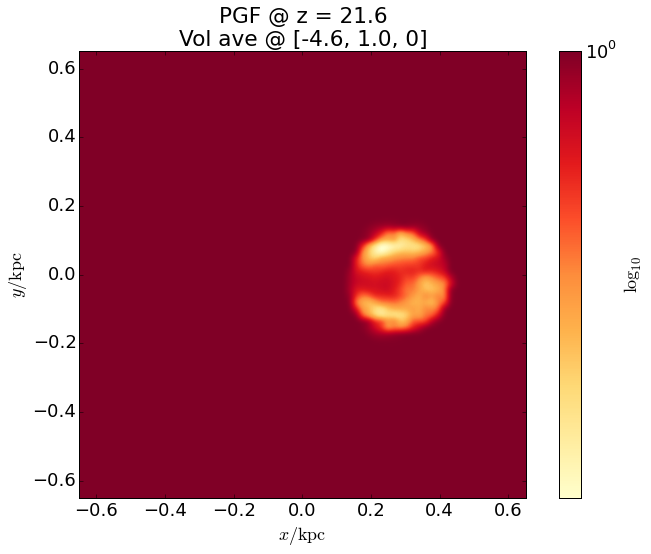

In [46]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="pgf",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [47]:
min(impData.g['pgf']),max(impData.g['pgf'][impData.g['pgf'] < 1.0])

(0.9867112674960099, 0.99999988175986265)

In [48]:
# 'invert' the pgf ... makes for better plotting.
impData.g['oneMpgf'] = 1.0 - impData.g['pgf']

In [49]:
max(impData.g['oneMpgf']),min(impData.g['oneMpgf'][impData.g['oneMpgf'] > 0.0])

(0.013288732503990097, 1.18240137347847e-07)

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


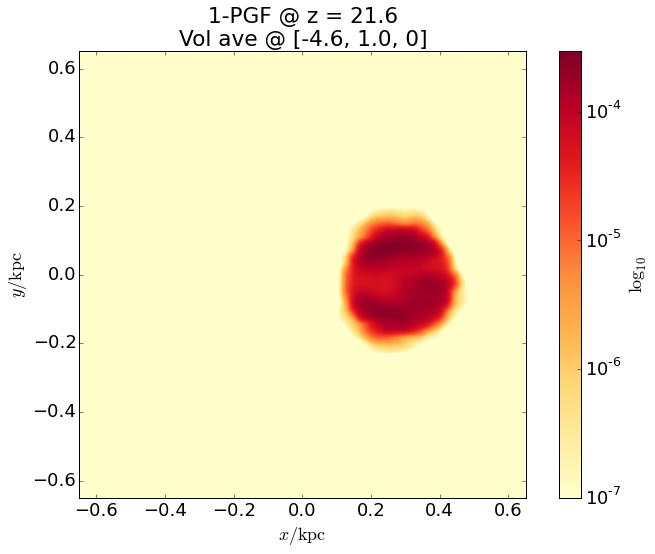

In [50]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "1-PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="oneMpgf",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


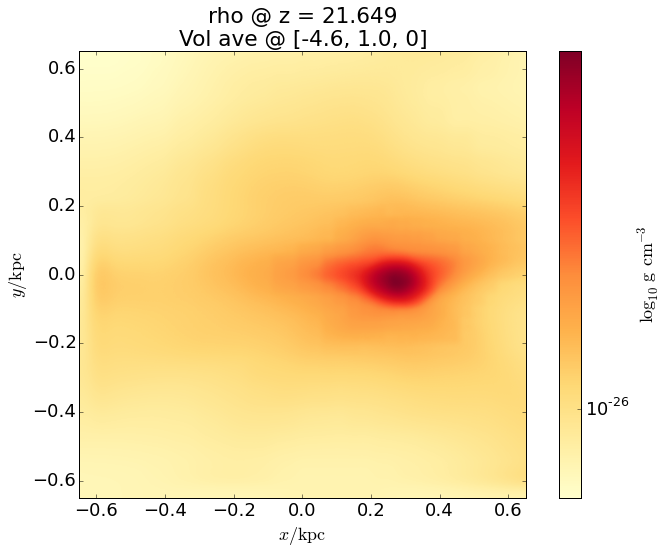

In [22]:
coords= [-4.6,1.0,0] # Center the plot on our cuboid
with pynbody.transformation.translate(impData,coords):
    titleStr = "rho @ z = %.3lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="rho",width="1.3 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=True, 
              units="g cm^-3",approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [51]:
# Generate a set of points that should all be zero... 
test = impData.g['oneMpgf'] - (12.45144 * impData.g['metal'])
test

SimArray([ 0.,  0.,  0., ...,  0.,  0.,  0.])

(-0.0005, 0.0005)

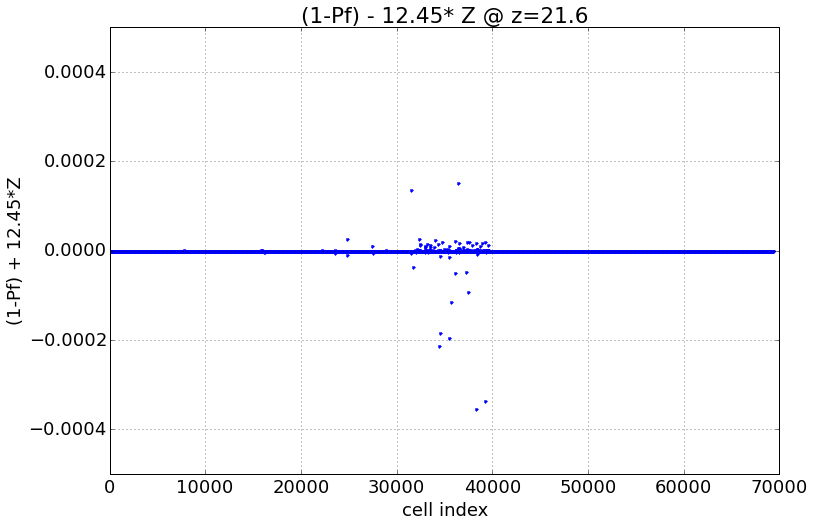

In [52]:
plt.plot(test,'.')
plt.title("(1-Pf) - 12.45* Z @ z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell index")
axes().set_ylabel("(1-Pf) + 12.45*Z")
plt.ylim(-.0005, .0005)
#plt.xlim(0, 0.00035)

/Users/earnric/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/earnric/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


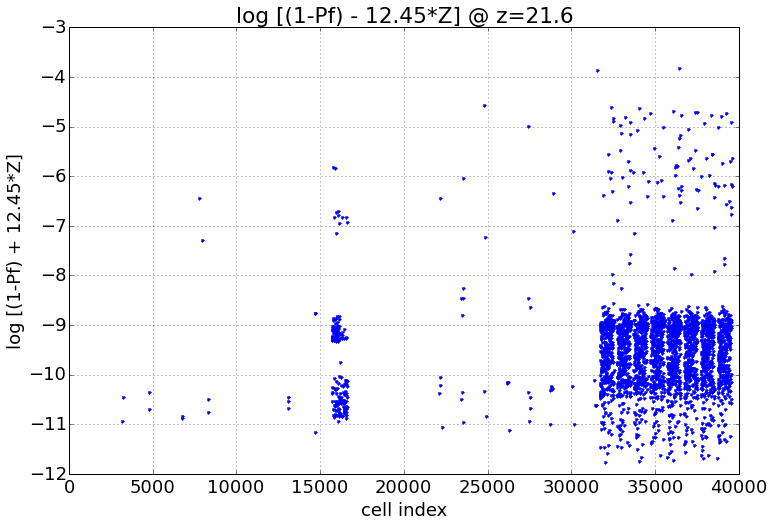

In [53]:
plt.plot(log10(test),'.')
plt.title("log [(1-Pf) - 12.45*Z] @ z=%.1f"%z)
plt.grid(True, which="both")
axes().set_xlabel("cell index")
axes().set_ylabel("log [(1-Pf) + 12.45*Z]")
#plt.ylim(-.0005, .0005)
#plt.xlim(0, 0.00035)

In [54]:
test = impData.g['pgf'] + impData.g['oneMpgf']
test[test != 1.0]

SimArray([], dtype=float64)

In [55]:
# If everything is correct, should be equal lens
len(impData.g['pgf']), len(test[test == 1.0])

(69305, 69305)

INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...
INFO:pynbody.sph:Rendering image on 32 threads...


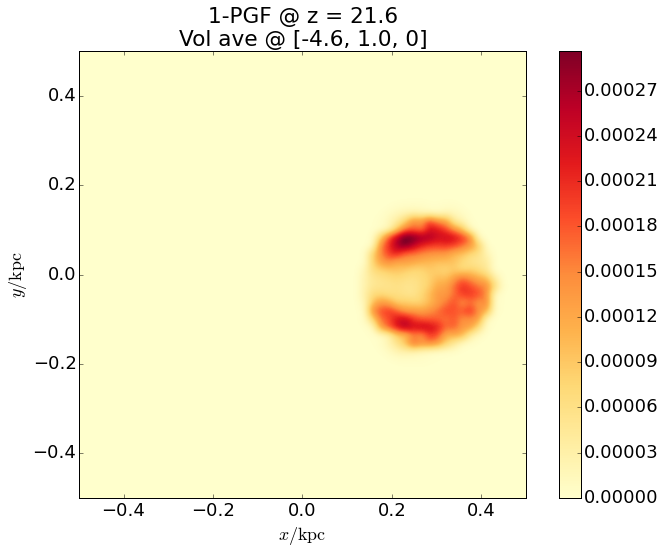

In [56]:
with pynbody.transformation.translate(impData,coords):
    titleStr = "1-PGF @ z = %.1lf" % z + "\nVol ave @ %s" % str(coords)
    sph.image(impData.g,qty="oneMpgf",width="1 kpc",cmap="YlOrRd", denoise=True ,av_z=True, log=False, 
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

In [57]:
diff = impData.g['oneMpgf'] - 12.45144 * impData.g['metal']

In [58]:
len(diff[diff<0.0]),len(diff)

(70, 69305)

# Next

In [22]:
s2 = pynbody.load('output_00009')
s2['pos']
s2['pos'] -= 0.5
s2.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Loading data from CPU 1
INFO:pynbody.snapshot.ramses:Loading data from CPU 2
INFO:pynbody.snapshot.ramses:Loading data from CPU 3
INFO:pynbody.snapshot.ramses:Loading data from CPU 4
INFO:pynbody.snapshot.ramses:Loading data from CPU 5
INFO:pynbody.snapshot.ramses:Loading data from CPU 6
INFO:pynbody.snapshot.ramses:Loading data from CPU 7
INFO:pynbody.snapshot.ramses:Loading data from CPU 8
INFO:pynbody.snapshot.ramses:Loading data from CPU 9
INFO:pynbody.snapshot.ramses:Loading data from CPU 10
INFO:pynbody.snapshot.ramses:Loading data from CPU 11
INFO:pynbody.snapshot.ramses:Loading data from CPU 12
INFO:pynbody.snapshot.ramses:Loading data from CPU 13
INFO:pynbody.snapshot.ramses:Loading data from CPU 14
INFO:pynbody.snapshot.ramses:Loading data from CPU 15
INFO:pynbody.snapshot.ramses:Loading data from CPU 16
INFO:pynbody.sna

In [23]:
z2 = 1/s2.properties['a']-1
print "Redshift =",z2
boxsizestring2 = "%.2f" % s2.properties['boxsize'].in_units('kpc')
boxsizestring2 += " kpc"
print boxsizestring2
print s2.properties['a']

Redshift = 20.9999457763
19.17 kpc
0.0454546574872


In [24]:
s2.g['metal'][s2.g['metal']<1e-7] = 0.0
s2.g['pzf'][s2.g['pzf']<1e-7] = 0.0
s2.g['pgf'][s2.g['pgf']>(1.0-1e-7)] = 1.0
s2.s['ppf'][s2.s['ppf']>1.0] = 1.0

In [25]:
temp=s2.g['metal']/(1.-s2.g['pgf'])

/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/array.py:337: RuntimeWarning: divide by zero encountered in divide
  return np.ndarray.__div__(self, rhs)
/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/array.py:337: RuntimeWarning: invalid value encountered in divide
  return np.ndarray.__div__(self, rhs)


In [26]:
len(s2.g['pgf'][(s2.g['pgf']== 1.0) & (s2.g['pgf']> 0)]),len(s2.g['pgf']),len(s2.g['pgf'][s2.g['pgf']<1.0])

(20666944, 20732720, 65776)

In [28]:
s2.g['metal'][s2.g['metal']>0.0]

SimArray([  6.18452148e-06,   3.77718323e-06,   1.16238418e-04, ...,
         1.92824046e-06,   2.55444505e-05,   4.22086214e-07])

In [29]:
len(s2.g['pgf'][(s2.g['pgf']< 1.0) & (s2.g['pgf']> 0)])

65776

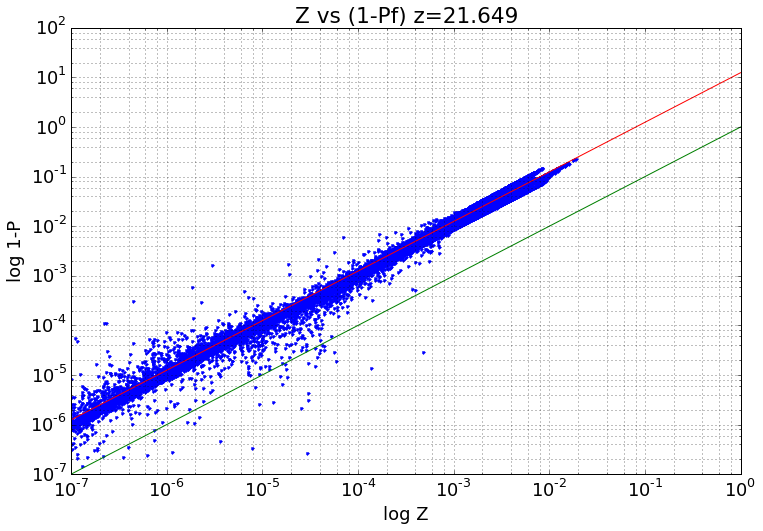

In [30]:
plt.loglog(s2.g['metal'],1.0-s2.g['pgf'],'.',linex,linex,linex,liney)
plt.title("Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")

In [31]:
impData2 = s2[pynbody.filt.Cuboid("4.0 kpc", "-1.6 kpc","-5 kpc","5.3 kpc", "-.3 kpc", "0 kpc")]

INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...
INFO:pynbody.sph:Rendering image on 64 threads...


SimArray([[  2.27503930e-18,   2.27503930e-18,   2.27503930e-18, ...,
          2.27503930e-18,   2.27503930e-18,   2.27503930e-18],
       [  2.27503930e-18,   2.27503930e-18,   2.27503930e-18, ...,
          2.27503930e-18,   2.27503930e-18,   2.27503930e-18],
       [  2.27503930e-18,   2.27503930e-18,   2.27503930e-18, ...,
          2.27503930e-18,   2.27503930e-18,   2.27503930e-18],
       ..., 
       [  2.27503930e-18,   2.27503930e-18,   2.27503930e-18, ...,
          2.27503930e-18,   2.27503930e-18,   2.27503930e-18],
       [  2.27503930e-18,   2.27503930e-18,   2.27503930e-18, ...,
          2.27503930e-18,   2.27503930e-18,   2.27503930e-18],
       [  2.27503930e-18,   2.27503930e-18,   2.27503930e-18, ...,
          2.27503930e-18,   2.27503930e-18,   2.27503930e-18]], dtype=float32)

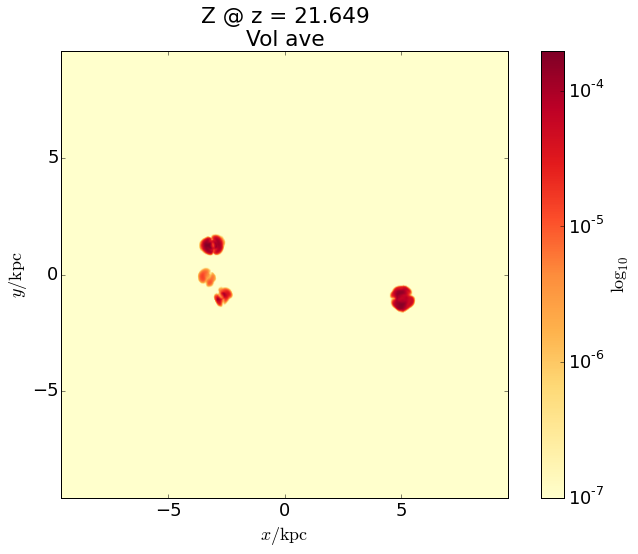

In [34]:
    titleStr = "Z @ z = %.3lf" % z + "\nVol ave"
    sph.image(s2.g,qty="metal",width=boxsizestring2,cmap="YlOrRd", denoise=True ,av_z=True, log=True, vmin=1e-7,
              approximate_fast=False,title=titleStr); #vmin=0.006, vmax=1.0,

##Next

In [5]:
s3 = pynbody.load('output_00010')
s3['pos']
s3['pos'] -= 0.5
s3.physical_units();

INFO:pynbody:Loading using backend <class 'pynbody.snapshot.ramses.RamsesSnap'>
/usr/local/Canopy_64bit/User/lib/python2.7/site-packages/pynbody/snapshot/ramses.py:360: RuntimeWarning: RamsesSnap is configured to use multiple processes, but the posix_ipc module is missing. Reverting to single thread.
  warnings.warn("RamsesSnap is configured to use multiple processes, but the posix_ipc module is missing. Reverting to single thread.", RuntimeWarning)
INFO:pynbody.snapshot.ramses:Loading hydro files
INFO:pynbody.snapshot.ramses:Loading data from CPU 1
INFO:pynbody.snapshot.ramses:Loading data from CPU 2
INFO:pynbody.snapshot.ramses:Loading data from CPU 3
INFO:pynbody.snapshot.ramses:Loading data from CPU 4
INFO:pynbody.snapshot.ramses:Loading data from CPU 5


AssertionError: 

In [ ]:
s3.g['metal'][s3.g['metal']<1e-7] = 0.0
s3.g['pzf'][s3.g['pzf']<1e-7] = 0.0
s3.g['pgf'][s3.g['pgf']>(1.0-1e-7)] = 1.0
s3.s['ppf'][s3.s['ppf']>1.0] = 1.0

In [ ]:
plt.loglog(s3.g['metal'],1.0-s3.g['pgf'],'.',linex,linex,linex,liney)
plt.title("Z vs (1-Pf) z=%.3f"%z)
plt.grid(True, which="both")
axes().set_xlabel("log Z")
axes().set_ylabel("log 1-P")